## This kernel was just to make some features which were more intuitive and some of then were suggested by @Tarun papa raju 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip


In [2]:
!unzip /kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
!unzip /kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
!unzip /kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
!unzip /kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip


Archive:  /kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
  inflating: train.csv               
Archive:  /kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
  inflating: test.csv                
Archive:  /kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
  inflating: test_labels.csv         
Archive:  /kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
  inflating: sample_submission.csv   


In [3]:
df=pd.read_csv('train.csv')

## regards for Tarun papa raju for his suggestions for similar kind of features in another competition
    *Length of the comment
    *Number of capitals - directly visible
    *Proportion of capitals - directly visible
    *Number of exclamation marks - assumption that toxic comments have lots of toxic comments
    *Number of question marks - assumption that angry people might not use question marks
    *Number of punctuation symbols - assumption that angry people might not use punctuation
    *Number of symbols - assumtion that words like fck or $# or sh*t mean more symbols in foul language (Thx for tip!)
    *Number of words - angry people might write short messages?
    *Number of unique words - assumption that angry comments are sometimes repeated many times
    *Proportion of unique words - see previous
    *Number of emoji's-totalnumber of emoji's
    *Number of (happy) smilies - Angry people wouldn't use happy smilies, right?

In [4]:
df['total_length'] = df['comment_text'].apply(len)
df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
df['num_exclamation_marks'] = df['comment_text'].apply(lambda comment: comment.count('!'))
df['num_question_marks'] = df['comment_text'].apply(lambda comment: comment.count('?'))
df['num_punctuation'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_symbols'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '*&$%'))
df['num_words'] = df['comment_text'].apply(lambda comment: len(comment.split()))
df['num_unique_words'] = df['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
df['num_smilies'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [5]:
import emoji
import re
def find_emoji(text):
    emo_text=emoji.demojize(text)
    line=re.findall(r'\:(.*?)\:',emo_text)
    return line
ls=[]
for i in range(len(df['comment_text'])):# we run this operation for first 10 comments and see if any emoji's
    line=find_emoji(df['comment_text'][i])
    if len(line)==0:
        ls.append(len(list(line)))
    else:
        ls.append(len(list(line)))

In [6]:
df['total_emoji']=ls

How dataset looks now

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_symbols,num_words,num_unique_words,words_vs_unique,num_smilies,total_emoji
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,0.064394,0,1,6,0,43,41,0.953488,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,0.071429,1,0,5,0,17,17,1.000000,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,0.017167,0,0,4,0,42,39,0.928571,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,0.017685,0,0,6,0,113,82,0.725664,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,0.029851,0,1,3,0,13,13,1.000000,0,0


correlation of features

In [8]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies', 'num_symbols','total_emoji')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{c:df[f].corr(df[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [9]:
df_correlations

,toxic,severe_toxic,obscene,threat,insult,identity_hate
total_length,-0.054470,0.010131,-0.042945,-0.008011,-0.045052,-0.013647
capitals,0.091175,0.143410,0.081691,0.033581,0.075945,0.053576
caps_vs_length,0.220777,0.169243,0.182452,0.055596,0.170384,0.093726
num_exclamation_marks,0.037337,0.060578,0.024362,0.034202,0.027010,0.006005
num_question_marks,0.027820,-0.004541,0.005404,-0.003949,0.004859,-0.000516
num_punctuation,-0.056714,-0.010763,-0.044119,-0.003723,-0.049487,-0.021698
num_words,-0.052444,0.008452,-0.042207,-0.006688,-0.043642,-0.014493
num_unique_words,-0.096256,-0.048377,-0.080942,-0.020279,-0.080960,-0.032796
words_vs_unique,0.056491,-0.027050,0.042755,-0.004020,0.043348,0.010632
num_smilies,-0.003833,-0.002564,-0.003254,-0.001524,-0.004066,0.001206


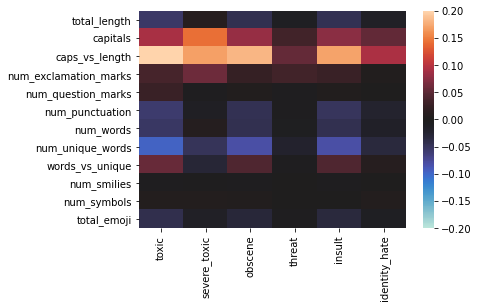

In [10]:
import seaborn as sns

ax = sns.heatmap(df_correlations, vmin=-0.2, vmax=0.2, center=0.0)

* Proportion of capitals
* Number of unique words
* Number of exclamation marks
* Number of punctuations

These were some relevant features and they can be used with some other features combined